# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [195]:
library(ggplot2)
library(reshape2)
require(plyr)

weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")
head(weatherPraga)
tail(weatherPraga)

STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,⋯,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
EZE00100082,1775,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",246.3,NA,246.3,E,⋯,NA,,NA,,10.55,E,13.64,E,7.46,E
EZE00100082,1776,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",114.6,NA,114.6,E,⋯,3481.8,E,NA,,8.53,E,11.72,E,5.34,E
EZE00100082,1777,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",62.6,NA,62.6,E,⋯,3628.0,E,NA,,8.67,E,11.76,E,5.58,E
EZE00100082,1778,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",188.4,NA,188.4,E,⋯,3330.2,E,NA,,9.91,E,13.17,E,6.65,E
EZE00100082,1779,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",109.5,NA,109.5,E,⋯,3216.0,E,NA,,10.23,E,13.64,E,6.82,E
EZE00100082,1780,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",94.5,NA,94.5,E,⋯,3344.6,E,NA,,8.64,E,11.93,E,5.34,E


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,⋯,HTDD,HTDD_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
225,EZE00100082,1999,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",247.0,NA,247.0,E,⋯,3008.1,E,361.8,",E",11.32,E,14.99,E,7.64,E
226,EZE00100082,2000,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",262.6,NA,262.6,E,⋯,2663.7,E,385.9,",E",11.98,E,15.65,E,8.30,E
227,EZE00100082,2001,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",240.5,NA,240.5,E,⋯,2793.2,E,552.0,",E",10.77,E,14.26,E,7.29,E
228,EZE00100082,2002,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",308.2,NA,308.2,E,⋯,2749.8,E,661.5,",E",11.51,E,15.22,E,7.79,E
229,EZE00100082,2003,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",415.4,NA,415.4,E,⋯,3035.6,E,267.1,",E",11.25,E,15.24,E,7.26,E
230,EZE00100082,2004,50.0906,14.4192,191,"PRAHA KLEMENTINUM, EZ",219.9,NA,219.9,E,⋯,2994.8,E,394.2,",E",10.97,E,14.57,E,7.37,E


Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [92]:
m = weatherPraga[,2]
n =  weatherPraga[,"PRCP"] 
mn = data.frame(m,n)

In [93]:
#buscar funcion que saque el valor maximo de un vector
max_precipitaciones = function(m){
    x=rep(NA,10)
    y=rep(NA,10)
    for(i in 1:10){
        x[i]=max(m, na.rm=TRUE)
        y[i]=weatherPraga[which.max(m),2]
        m[which.max(m)]=0
    }
    valor_PRCP=x
    year=y
    data.frame(year,valor_PRCP)
}

In [94]:
print("Los 10 años que más precipitiaciones han tenido junto con su valor correspondiente son:")
diez_max=max_precipitaciones(n)
diez_max

[1] "Los 10 años que más precipitiaciones han tenido junto con su valor correspondiente son:"


year,valor_PRCP
1939,745.5
1828,665.4
2002,661.5
1946,638.3
1890,637.3
1837,634.9
1958,633.1
1831,625.7
1966,624.1
1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

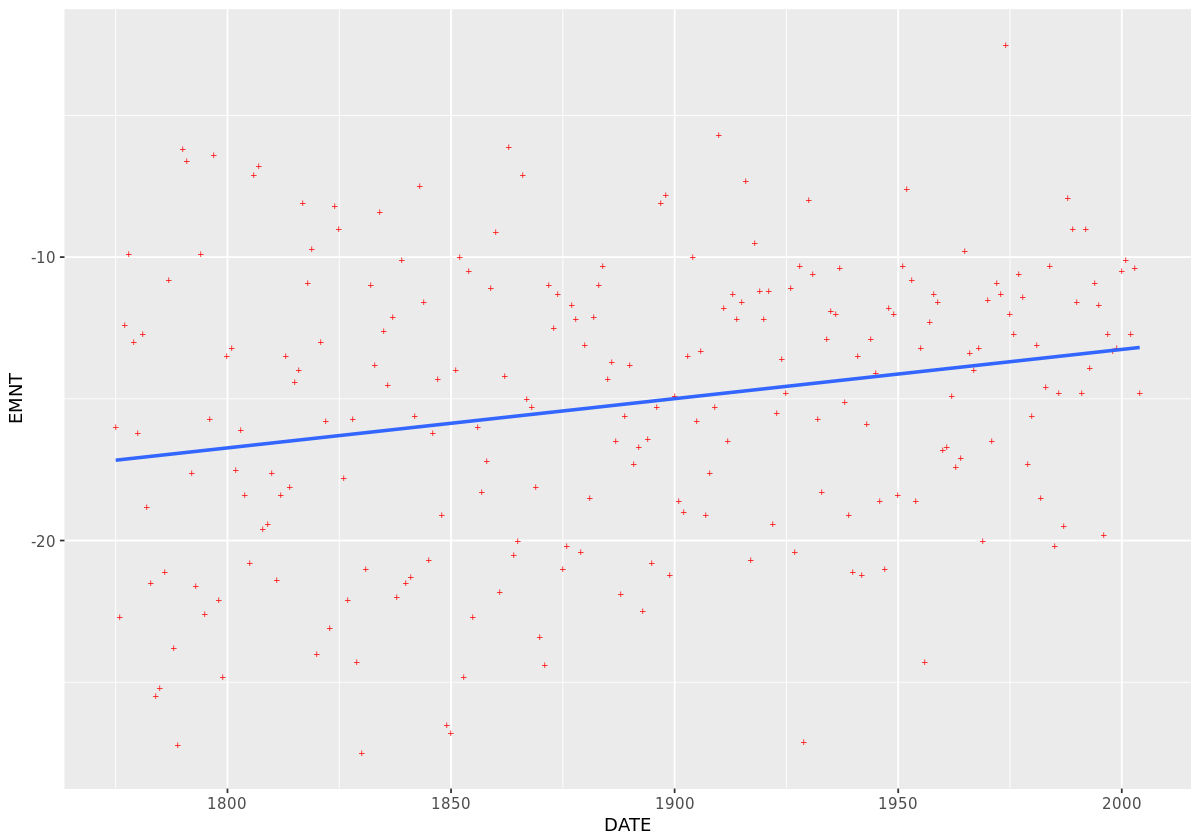

In [95]:
require(ggplot2)
ggplot(data=weatherPraga,aes(x=DATE,y=EMNT))+geom_point(color="red", pch="+")+geom_smooth(method="lm", se=FALSE)

In [96]:
regresion=lm(formula=weatherPraga$EMNT ~ weatherPraga$DATE, data = weatherPraga)
summary(regresion)


Call:
lm(formula = weatherPraga$EMNT ~ weatherPraga$DATE, data = weatherPraga)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.6098  -4.0003   0.5335   3.2636  11.2083 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -48.00664    9.17007  -5.235 3.74e-07 ***
weatherPraga$DATE   0.01738    0.00485   3.582 0.000416 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.884 on 228 degrees of freedom
Multiple R-squared:  0.05329,	Adjusted R-squared:  0.04913 
F-statistic: 12.83 on 1 and 228 DF,  p-value: 0.0004162


In [97]:
print(paste("La temperatura ha aumentado",.01738,"ºC de media cada año"))

[1] "La temperatura ha aumentado 0.01738 ºC de media cada año"


¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [199]:
media_antigua_ = rep(NA,19) 
media_nueva_ = rep(NA,19) 
for (i in 1:20){
    media_antigua_[i]=weatherPraga$EMNT[i]
    media_nueva_[i]=weatherPraga$EMNT[210+i]
}
media_antigua=sum(media_antigua_)/20
media_nueva=sum(media_nueva_)/20
print(paste("La media de las temperaturas minimas de 1775 a 1794 es:",media_antigua))
print(paste("La media de las temperaturas minimas entre 1985 y 2004 es:",media_nueva))

[1] "La media de las temperaturas minimas de 1775 a 1794 es: -16.935"
[1] "La media de las temperaturas minimas entre 1985 y 2004 es: -13.04"


In [200]:
print(paste("La diferencia entre ambas temperaturas es:",media_nueva-media_antigua,"grados"))
print("Para ver que test utilizar, primero comprobamos si los datos provienen de una distribución gausiana:")
mezcla=data.frame(media_antigua_,media_nueva_)
var(mezcla$media_antigua_)
var(mezcla$media_nueva_)

[1] "La diferencia entre ambas temperaturas es: 3.895 grados"
[1] "Para ver que test utilizar, primero comprobamos si los datos provienen de una distribución gausiana:"


[1] 42.38661

[1] 12.55937

In [201]:
shapiro.test(mezcla$media_antigua_)
shapiro.test(mezcla$media_nueva_)


	Shapiro-Wilk normality test

data:  mezcla$media_antigua_
W = 0.95089, p-value = 0.3808



	Shapiro-Wilk normality test

data:  mezcla$media_nueva_
W = 0.91373, p-value = 0.0751


In [202]:
mezcla=melt(mezcla,x=mezcla$media_nueva_)

No id variables; using all as measure variables


In [204]:
'Al venir ambas medias de una gaussiana y tener diferentes varanzas aplicaremos el test de welch para ver si son estadisticamente significativas'

[1] "Al venir ambas medias de una gaussiana y tener diferentes varanzas aplicaremos el test de welch para ver si son estadisticamente significativas"

In [203]:
t.test(value~variable, data=mezcla)


	Welch Two Sample t-test

data:  value by variable
t = -2.3499, df = 29.351, p-value = 0.02571
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -7.2832043 -0.5067957
sample estimates:
mean in group media_antigua_   mean in group media_nueva_ 
                     -16.935                      -13.040 


In [103]:
print("A vista de los resultados que da el test, la diferencia es estadísticamente significativa")

[1] "A vista de los resultados que da el test, la diferencia es estadísticamente significativa"


## Datos banco mundial

Carga los datos del banco mundial

In [104]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
colnames(realCountryData)[1] <- "Country.Code"
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",length(unique(realCountryData$Country.Code)),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*.
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [105]:
#Cómo hago para tener elementos str de una tabla como son y no con el equivalente factor numérico en esta situación

In [106]:
pais_co2=merge(realCountryData, databank, by="Country.Code")

CO2 = rep(0, 217)
Codigo_pais = data.frame(Codigo_pais=rep(NA, 217), id=c(1:217))
Nombre_pais = data.frame(Nombre_pais=rep(NA, 217), id=c(1:217))

j=1
for(i in 1:length(pais_co2$Country.Name)){
    if(pais_co2$Indicator.Code[i] == "EN.ATM.GHGT.KT.CE"){
        CO2[j]=pais_co2[i,"1970"]
        Codigo_pais[j,]=pais_co2$Country.Code[i]
        Nombre_pais[j,]=pais_co2$Country.Name[i]
        j=j+1
    }
}

pais_co2_ordenado = data.frame(Codigo_pais, Nombre_pais, CO2)
pais_co2_ordenado = arrange(pais_co2_ordenado, by = CO2, decreasing = TRUE)

print(paste("El pais que mas toneladas de CO2 expulsó en 1970 fue",pais_co2_ordenado[1,3],
            "con",pais_co2_ordenado[1,5],"toneladas"))

[1] "El pais que mas toneladas de CO2 expulsó en 1970 fue United States con 5400503.5 toneladas"


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [107]:
databank2012<-databank[databank$Indicator.Code == "EN.ATM.GHGT.KT.CE",c("2012","Country.Name","Country.Code")]
co2eq2012<-merge(databank2012,realCountryData, by="Country.Code")[,c("2012","Country.Name","Country.Code")]
head(co2eq2012[order(co2eq2012$"2012",decreasing = T),],5)

,2012,Country.Name,Country.Code
37,12454711,China,CHN
204,6343841,United States,USA
90,3002895,India,IND
27,2989418,Brazil,BRA
166,2803398,Russian Federation,RUS


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [108]:
myGeometricMean<-function(X,na.rm=F){
    if (na.rm){
        X<-na.omit(X)
    }
    m<-1
    for (xi in X){
        m<-m*xi        
    }
    m^(1/length(X))
}

[1] "La media del porcentaje de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012 ha sido de un: 7.76 %"


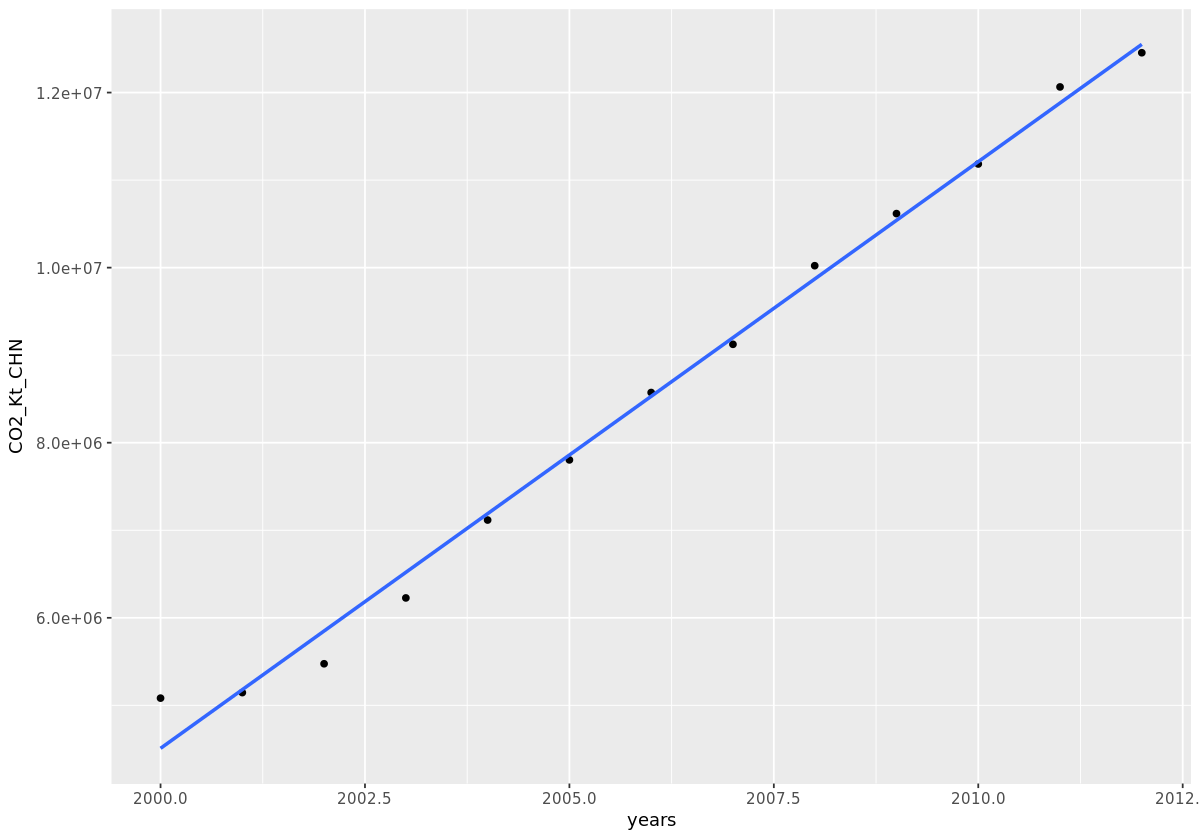

In [109]:
CO2_Kt_CHN=rep(NA, 12)
years=(2000:2012)
m=1
for(i in 1:length(pais_co2$Country.Name)){
    if(pais_co2$Indicator.Code[i] == "EN.ATM.GHGT.KT.CE" & pais_co2$Country.Code[i] == "CHN"){
        CO2_Kt_CHN=c(pais_co2$"2000"[i],pais_co2$"2001"[i],pais_co2$"2002"[i],pais_co2$"2003"[i],pais_co2$"2004"[i],
                     pais_co2$"2005"[i],pais_co2$"2006"[i],pais_co2$"2007"[i],pais_co2$"2008"[i],pais_co2$"2009"[i],
                     pais_co2$"2010"[i],pais_co2$"2011"[i],pais_co2$"2012"[i])
    }
}
CO2_Kt_CHN = data.frame(CO2_Kt_CHN,years)
ggplot(CO2_Kt_CHN, aes(y=CO2_Kt_CHN,x=years))+geom_point()+geom_smooth(method="lm", se=FALSE)
incremento_anual = c(NA,CO2_Kt_CHN$CO2_Kt_CHN[2:length(CO2_Kt_CHN$CO2_Kt_CHN)]/CO2_Kt_CHN$CO2_Kt_CHN[1:length(CO2_Kt_CHN$CO2_Kt_CHN)-1])
incremento_anual = (myGeometricMean(incremento_anual,na.rm=T)-1)*100
print(paste("La media del porcentaje de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012 ha sido de un:",
            round(incremento_anual,2),"%"))

Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2017 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

In [110]:
colnames(regionData)[1] <- "Country.Code"
#regionData
regiones_CO2=merge(regionData,databank, by = "Country.Code")
regiones_CO2[,2]=NULL
regiones_CO2[,2]=NULL
regiones_CO2[,2]=NULL
regiones_CO2[,2]=NULL
regiones_CO2[,2]=NULL
regiones_CO2[,3]=NULL
#regiones_CO2

#melt(data.frame(CC=regiones_CO2$Country.Code,IN=regiones_CO2$Indicator.Code,years=y), id = "years")

In [111]:
CO2_Kt = data.frame(CO2_Kt_PC_1960=rep(0, 217),CO2_Kt_PC_1990=rep(0, 217),CO2_Kt_PC_2017=rep(0, 217))
Codigo_pais = data.frame(Codigo_pais=rep(NA, 217), id=c(1:217))
Nombre_pais = data.frame(Nombre_pais=rep(NA, 217), id=c(1:217))
j=1
for(i in 1:length(pais_co2$Country.Name)){
    if(pais_co2$Indicator.Code[i] == "EN.ATM.CO2E.PC"){
        CO2_Kt[j,]=c(pais_co2[i,"1960"]/1000,pais_co2[i,"1990"]/1000,pais_co2[i,"2012"]/1000)
        Codigo_pais[j,]=pais_co2$Country.Code[i]
        Nombre_pais[j,]=pais_co2$Country.Name[i]
        j=j+1
    }
}
comp_co2_PC = data.frame(Codigo_pais, Nombre_pais, CO2_Kt)
comp_co2_PC[,"id"] = NULL
comp_co2_PC[,"id.1"] = NULL
#head(comp_co2_PC)
comp_co2_PC=melt(data.frame(CO2_Kt_PC_1960=comp_co2_PC$CO2_Kt_PC_1960,CO2_Kt_PC_1990=comp_co2_PC$CO2_Kt_PC_1990,
                 CO2_Kt_PC_2012=comp_co2_PC$CO2_Kt_PC_2017,Codigo_pais))
#head(comp_co2_PC)

Using Codigo_pais, id as id variables


Warning message:
“Removed 122 rows containing non-finite values (stat_boxplot).”

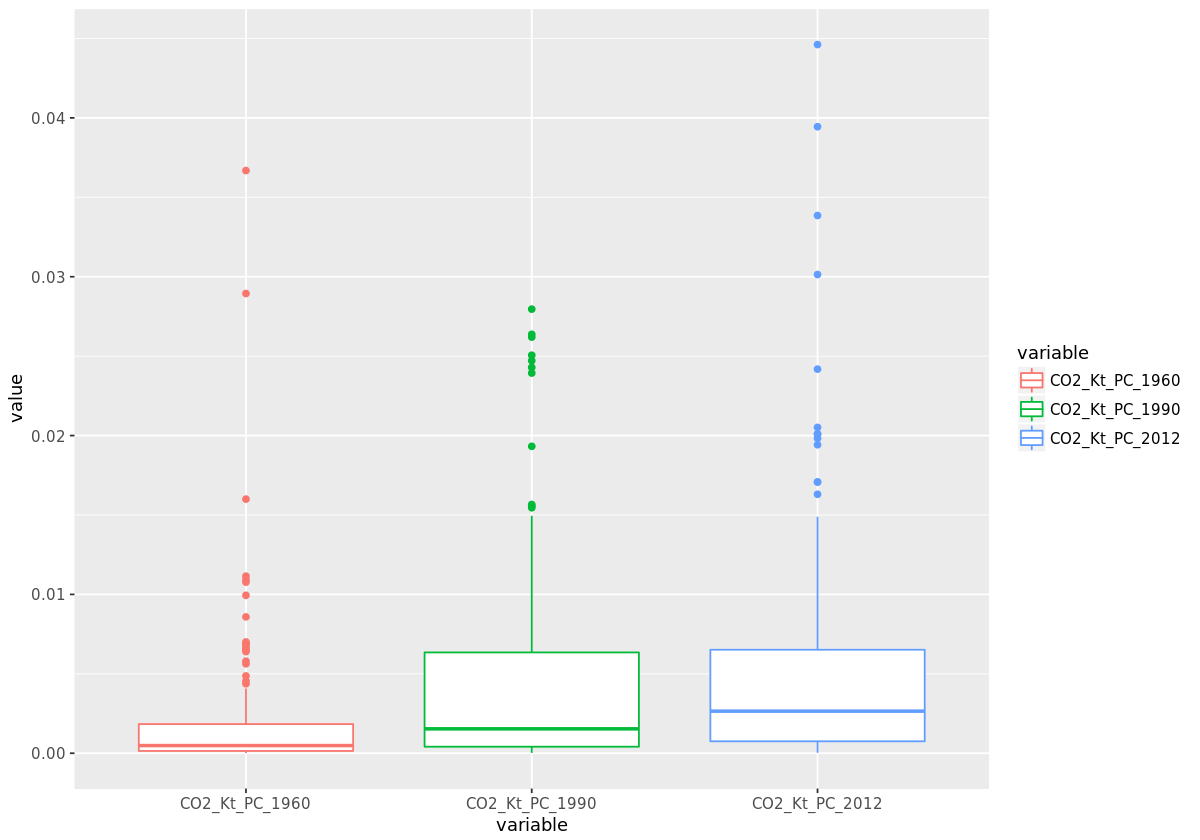

In [112]:
require(ggplot2)
comp_co2_PC$variable=factor(comp_co2_PC$variable)
options(repr.plot.height=7,repr.plot.width=10)
ggplot(comp_co2_PC,aes(x=variable,y=value,color=variable,group=variable))+geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


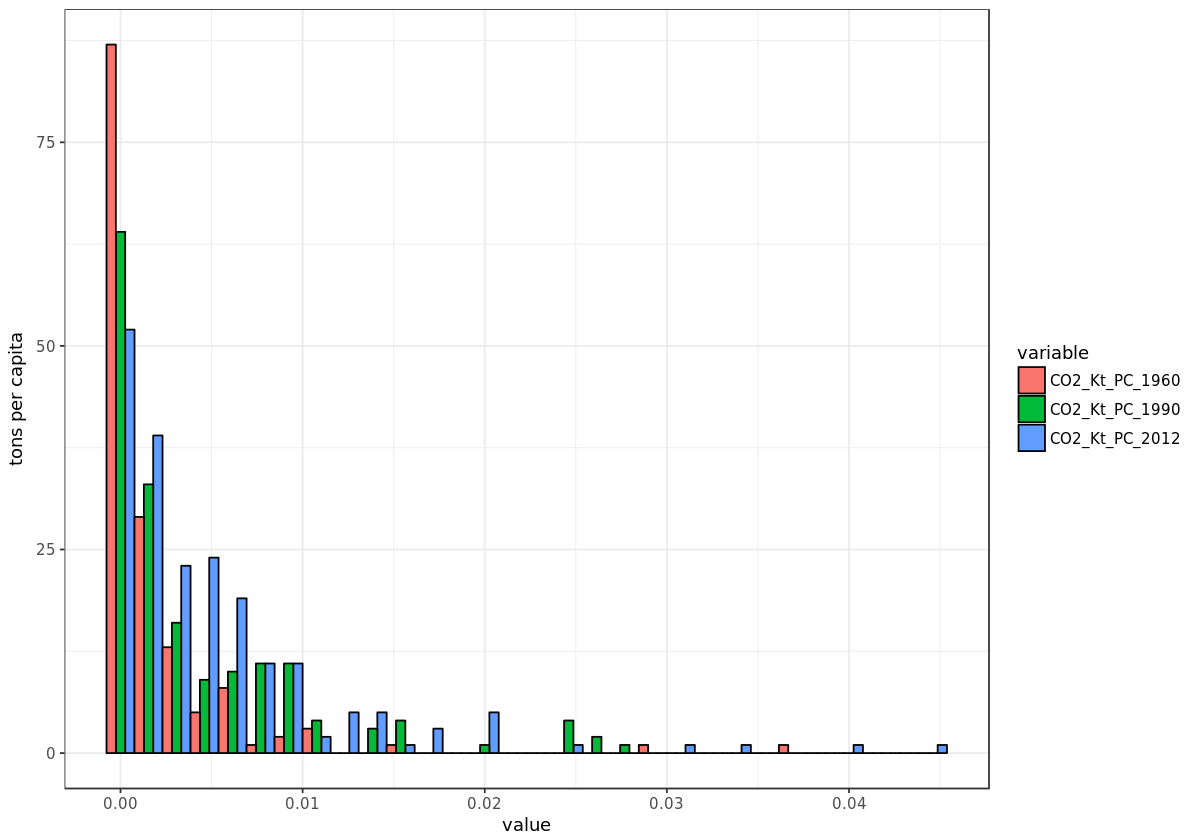

In [114]:
options(repr.plot.height=7,repr.plot.width=10)
ggplot(comp_co2_PC,aes(x=value,group=variable,fill=variable))+geom_histogram(na.rm=T,position = "dodge",color="black")+
    theme_bw()+ylab("tons per capita")

Warning message:
“Removed 122 rows containing non-finite values (stat_density).”

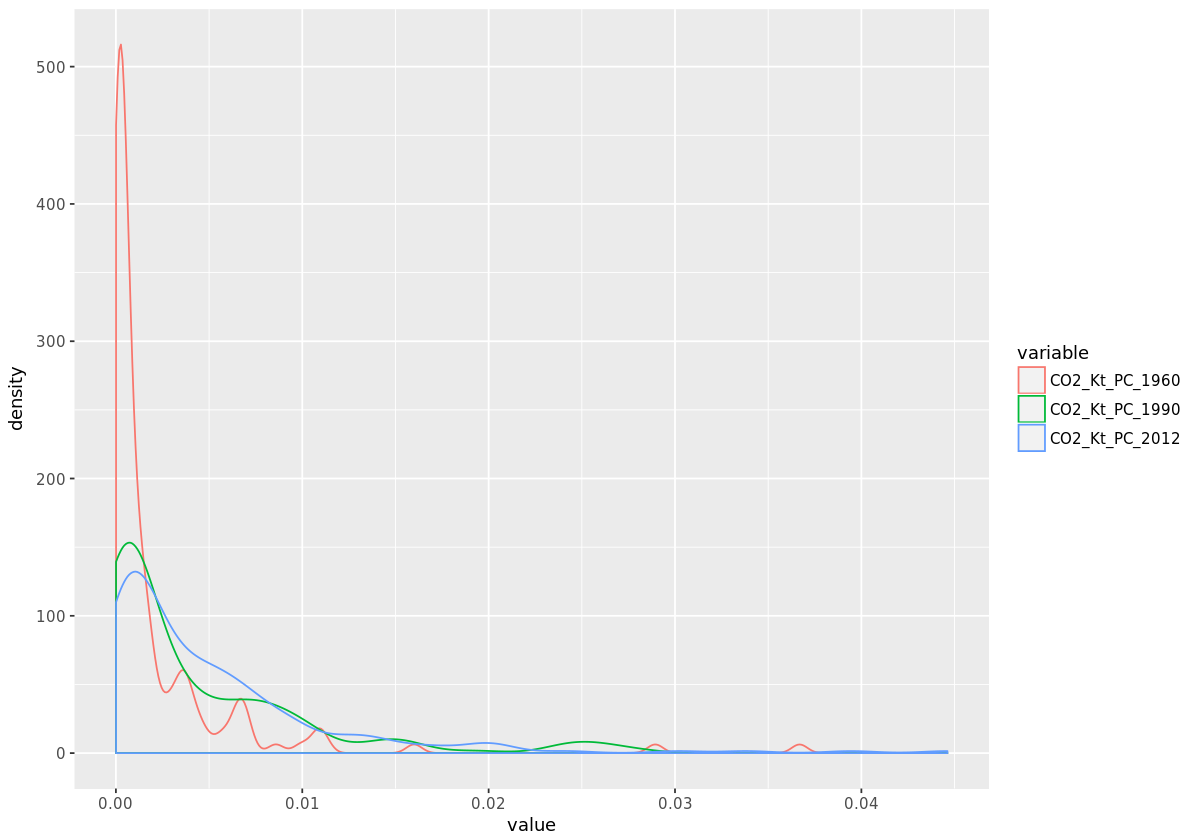

In [115]:
options(repr.plot.height=7,repr.plot.width=10)
ggplot(comp_co2_PC,aes(x=value,group=variable,color=variable))+geom_density()

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

In [116]:
require(reshape2)
colnames(regionData)[1] <- "Country.Code"

regiones_CO2=merge(regionData,databank, by = "Country.Code")
regiones_CO2[,2]=NULL
regiones_CO2[,2]=NULL
regiones_CO2[,2]=NULL
regiones_CO2[,2]=NULL
regiones_CO2[,2]=NULL
regiones_CO2[,3]=NULL

regiones_CO2_origin=regiones_CO2
head(regiones_CO2_origin)

regiones_CO2=melt(data.frame(Indicator.Code=regiones_CO2$Indicator.Code,Country.Code=regiones_CO2$Country.Code,
                             regiones_CO2[,(4:62)]))
m=data.frame(matrix(NA,1000,ncol=5))
colnames(m)=c("indicator.Code","Country.Code","Var.68","variable","value")
head(regiones_CO2)

Country.Code,Country.Name,Indicator.Code,1960,1961,1962,1963,1964,1965,1966,⋯,2009,2010,2011,2012,2013,2014,2015,2016,2017,Var.68
ARB,Arab World,ER.LND.PTLD.ZS,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,9.460760e+00,NA,NA,NA,NA
ARB,Arab World,ER.MRN.PTMR.ZS,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,5.488673e+00,NA,NA,NA,NA
ARB,Arab World,IQ.CPA.PUBS.XQ,NA,NA,NA,NA,NA,NA,NA,⋯,2.680000e+00,2.660000e+00,2.66000e+00,2.640000e+00,2.640000e+00,2.640000e+00,2.62,2.62,NA,NA
ARB,Arab World,IC.BUS.EASE.XQ,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ARB,Arab World,EG.FEC.RNEW.ZS,NA,NA,NA,NA,NA,NA,NA,⋯,5.062191e+00,4.854648e+00,4.70178e+00,4.179736e+00,4.231887e+00,4.184590e+00,NA,NA,NA,NA
ARB,Arab World,EG.ELC.RNWX.KH,NA,NA,NA,NA,NA,NA,NA,⋯,1.631000e+09,2.515000e+09,2.56100e+09,2.436000e+09,3.489000e+09,4.328000e+09,NA,NA,NA,NA


Using Indicator.Code, Country.Code, Var.68 as id variables


Indicator.Code,Country.Code,Var.68,variable,value
ER.LND.PTLD.ZS,ARB,NA,X1960,NA
ER.MRN.PTMR.ZS,ARB,NA,X1960,NA
IQ.CPA.PUBS.XQ,ARB,NA,X1960,NA
IC.BUS.EASE.XQ,ARB,NA,X1960,NA
EG.FEC.RNEW.ZS,ARB,NA,X1960,NA
EG.ELC.RNWX.KH,ARB,NA,X1960,NA


In [117]:
j=1
for (i in 1:length(regiones_CO2$Indicator.Code)){
    if(regiones_CO2$Indicator.Code[i]=="EN.ATM.CO2E.KT"&(regiones_CO2$Country.Code[i]=="WLD"|regiones_CO2$Country.Code[i]=="EUU"|
                                                        regiones_CO2$Country.Code[i]=="SSA"|regiones_CO2$Country.Code[i]=="NAC"|
                                                        regiones_CO2$Country.Code[i]=="TEA")){
        for(g in 1:5){
            m[j,g]=regiones_CO2[i,g]
        }
        j=j+1
    }
}
m[,3]=NULL;m=na.omit(m)

In [118]:
head(m)

indicator.Code,Country.Code,variable,value
32,72,1,2359594.9
32,168,1,3083749.0
32,213,1,126081.5
32,228,1,840235.7
32,257,1,9396705.8
32,72,2,2445945.7


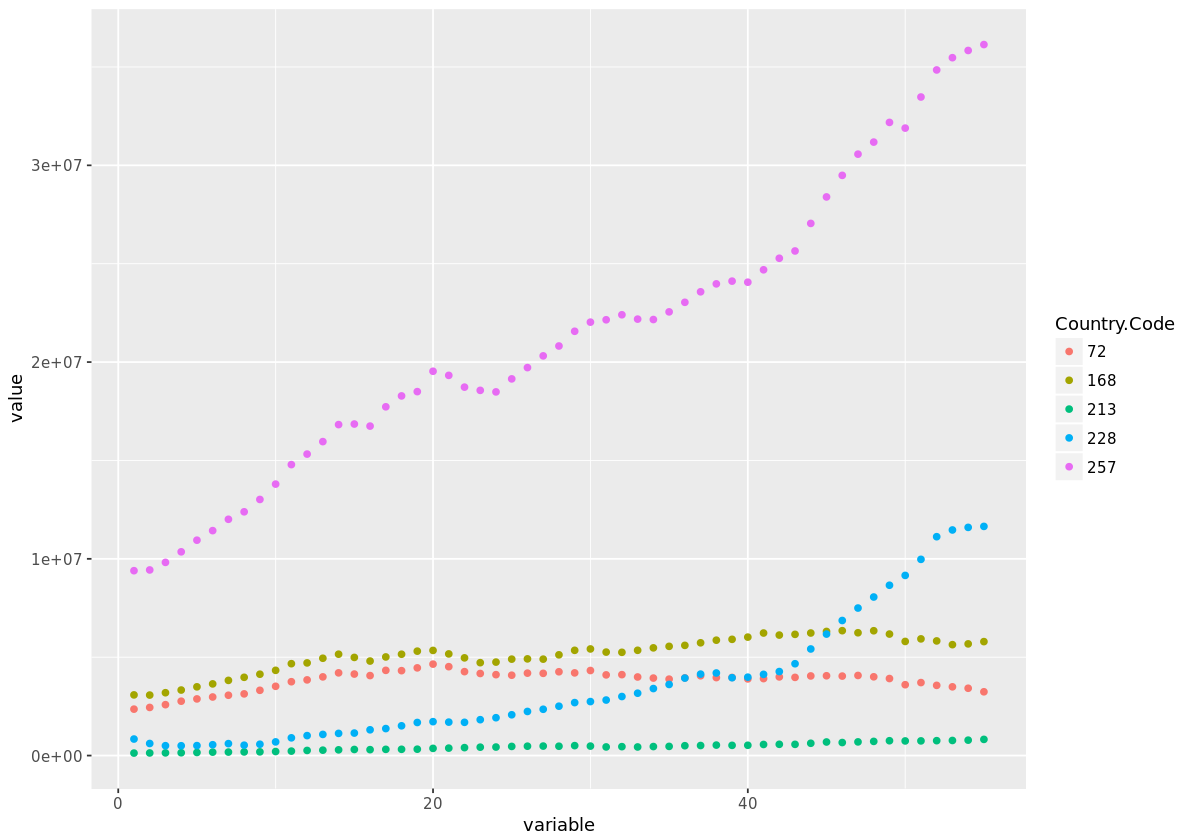

In [119]:
m$Country.Code=factor(m$Country.Code)
ggplot(m,aes(x=variable,y=value,group=Country.Code, color=Country.Code))+geom_point()

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

In [120]:
CO2_WLD_Kt = rep(0, 58)
years = c(1960:2017)
for(i in 1:length(regiones_CO2_origin$Indicator.Code)){
    if(regiones_CO2_origin$Indicator.Code[i]=="EN.ATM.GHGT.KT.CE" & regiones_CO2$Country.Code[i]=="WLD"){
        CO2_WLD_Kt=regiones_CO2_origin[i,c(12:61)]
    }
}
#head(CO2_WLD_Kt)
CO2_WLD_Kt=na.omit(melt(data.frame(values=CO2_WLD_Kt[1,])))
CO2_WLD_Kt$variable=c(1970:2012)
#head(CO2_WLD_Kt);tail(CO2_WLD_Kt)

No id variables; using all as measure variables


In [121]:
g_1=lm(data=CO2_WLD_Kt,formula = value ~ poly(variable,1))
g_3=lm(data=CO2_WLD_Kt,formula = value ~ poly(variable,3))
g_10=lm(data=CO2_WLD_Kt,formula = value ~ poly(variable,10))
#g_1
#summary(g_1);summary(g_2);summary(g_3);

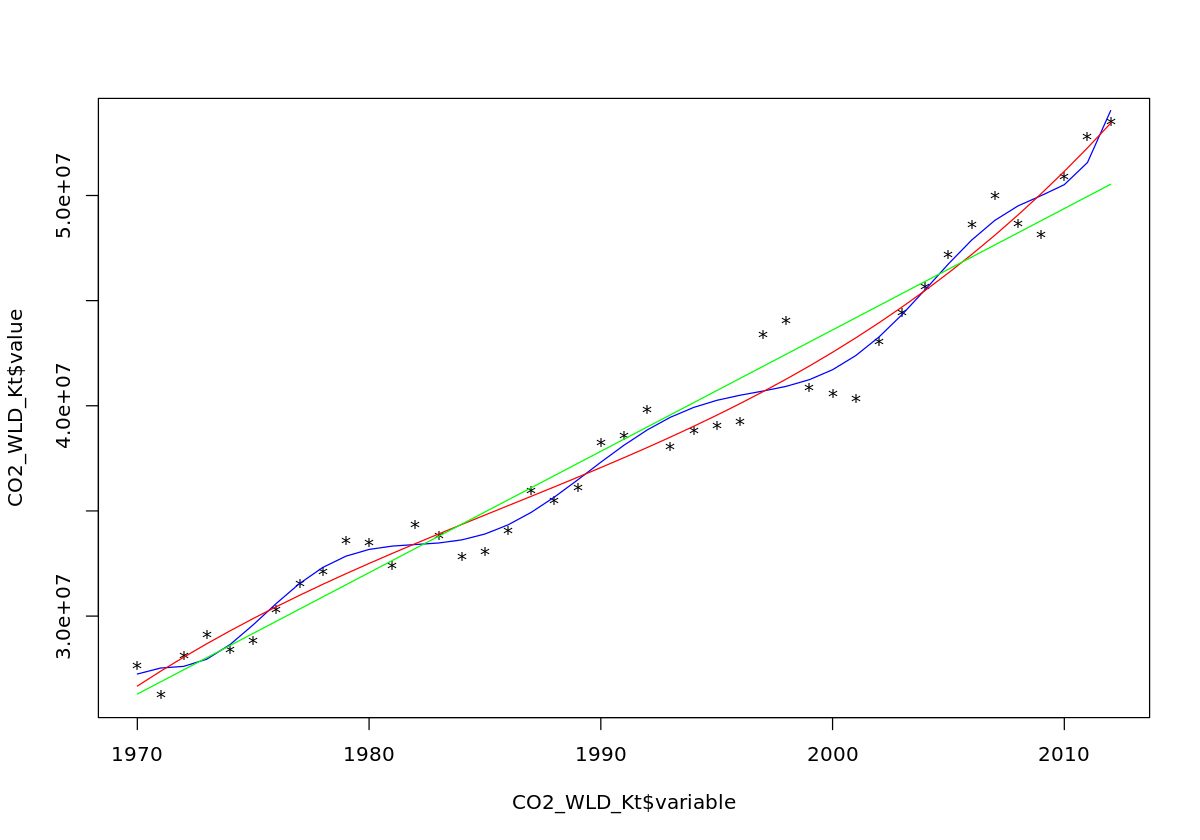

In [122]:
plot(x=CO2_WLD_Kt$variable,y=CO2_WLD_Kt$value,pch='*')
lines(CO2_WLD_Kt$variable,predict(g_10,data.frame(CO2_WLD_Kt)),col="blue")
lines(CO2_WLD_Kt$variable,predict(g_3,data.frame(CO2_WLD_Kt)),col="red")
lines(CO2_WLD_Kt$variable,predict(g_1,data.frame(CO2_WLD_Kt)),col="green")
#ggplot(CO2_WLD_Kt,aes(x=variable,y=value))+geom_point()+geom_smooth(data=g_1)

In [123]:
summary(g_1);summary(g_3);summary(g_10);


Call:
lm(formula = value ~ poly(variable, 1), data = CO2_WLD_Kt)

Residuals:
     Min       1Q   Median       3Q      Max 
-3819986 -1269567    55807  1215199  2991690 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       38413883     242042  158.71   <2e-16 ***
poly(variable, 1) 46968215    1587178   29.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1587000 on 41 degrees of freedom
Multiple R-squared:  0.9553,	Adjusted R-squared:  0.9542 
F-statistic: 875.7 on 1 and 41 DF,  p-value: < 2.2e-16



Call:
lm(formula = value ~ poly(variable, 3), data = CO2_WLD_Kt)

Residuals:
     Min       1Q   Median       3Q      Max 
-2863263  -853699  -146184   909560  2778744 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        38413883     194970 197.024  < 2e-16 ***
poly(variable, 3)1 46968215    1278505  36.737  < 2e-16 ***
poly(variable, 3)2  5159780    1278505   4.036 0.000246 ***
poly(variable, 3)3  3593444    1278505   2.811 0.007694 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1279000 on 39 degrees of freedom
Multiple R-squared:  0.9724,	Adjusted R-squared:  0.9703 
F-statistic: 457.9 on 3 and 39 DF,  p-value: < 2.2e-16



Call:
lm(formula = value ~ poly(variable, 10), data = CO2_WLD_Kt)

Residuals:
     Min       1Q   Median       3Q      Max 
-2021373  -812089  -184889   650828  3122953 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          38413883     187008 205.413  < 2e-16 ***
poly(variable, 10)1  46968215    1226291  38.301  < 2e-16 ***
poly(variable, 10)2   5159780    1226291   4.208 0.000195 ***
poly(variable, 10)3   3593444    1226291   2.930 0.006200 ** 
poly(variable, 10)4    176599    1226291   0.144 0.886395    
poly(variable, 10)5     96549    1226291   0.079 0.937735    
poly(variable, 10)6   -136531    1226291  -0.111 0.912045    
poly(variable, 10)7  -1839002    1226291  -1.500 0.143508    
poly(variable, 10)8   2514167    1226291   2.050 0.048610 *  
poly(variable, 10)9   2350331    1226291   1.917 0.064254 .  
poly(variable, 10)10  -583925    1226291  -0.476 0.637187    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Re

In [124]:
print(paste("A vista de los resultados el modelo que mejor se ajusta es la regresion lineal de grado 3 y por 
tanto nos fiamos"))

[1] "A vista de los resultados el modelo que mejor se ajusta es la regresion lineal de grado 3 y por \ntanto nos fiamos"


In [125]:
print("El valor predicho por el modelo lineal es:")
predict(g_1,data.frame(variable=2020))

[1] "El valor predicho por el modelo lineal es:"


1 
55152034

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [126]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

In [172]:
?bind

In [183]:
CO2_WLD_Kt = rep(0, 58)
years = c(1968:2014)
for(i in 1:length(regiones_CO2_origin$Indicator.Code)){
    if(regiones_CO2_origin$Indicator.Code[i]=="EN.ATM.CO2E.KT" & regiones_CO2$Country.Code[i]=="WLD"){
        CO2_WLD_Kt=regiones_CO2_origin[i,c(12:61)]
    }
}
CO2_WLD_Kt
#CO#2_WLD_Kt=merge(CO2_WLD_Kt,years)
CO2_WLD_Kt=na.omit(melt(data.frame(CO2_WLD_Kt[1,])))
colnames(CO2_WLD_Kt)=c("year","value")
CO2_WLD_Kt=data.frame(year=years,value=CO2_WLD_Kt$value)
#CO2_WLD_Kt$year=factor(CO2_WLD_Kt$year)
#CO2_WLD_Kt=data.frame(CO2_WLD_Kt)
head(CO2_WLD_Kt)

,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,⋯,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
3654,13017194,13797117,14788798,15323176,15957193,16822109,16850822,16745792,17726098,18279804,⋯,32181592,31891899,33472376,34847501,35470891,35837591,36138285,NA,NA,NA


No id variables; using all as measure variables


year,value
1968,13017194
1969,13797117
1970,14788798
1971,15323176
1972,15957193
1973,16822109


[1] 717

year,average
1958,315.1889
1959,315.9742
1960,316.9075
1961,317.6375
1962,318.4508
1963,318.9942


year,average,value
1968,323.0450,13017194
1969,324.6242,13797117
1970,325.6800,14788798
1971,326.3200,15323176
1972,327.4533,15957193
1973,329.6767,16822109


`geom_smooth()` using method = 'loess'


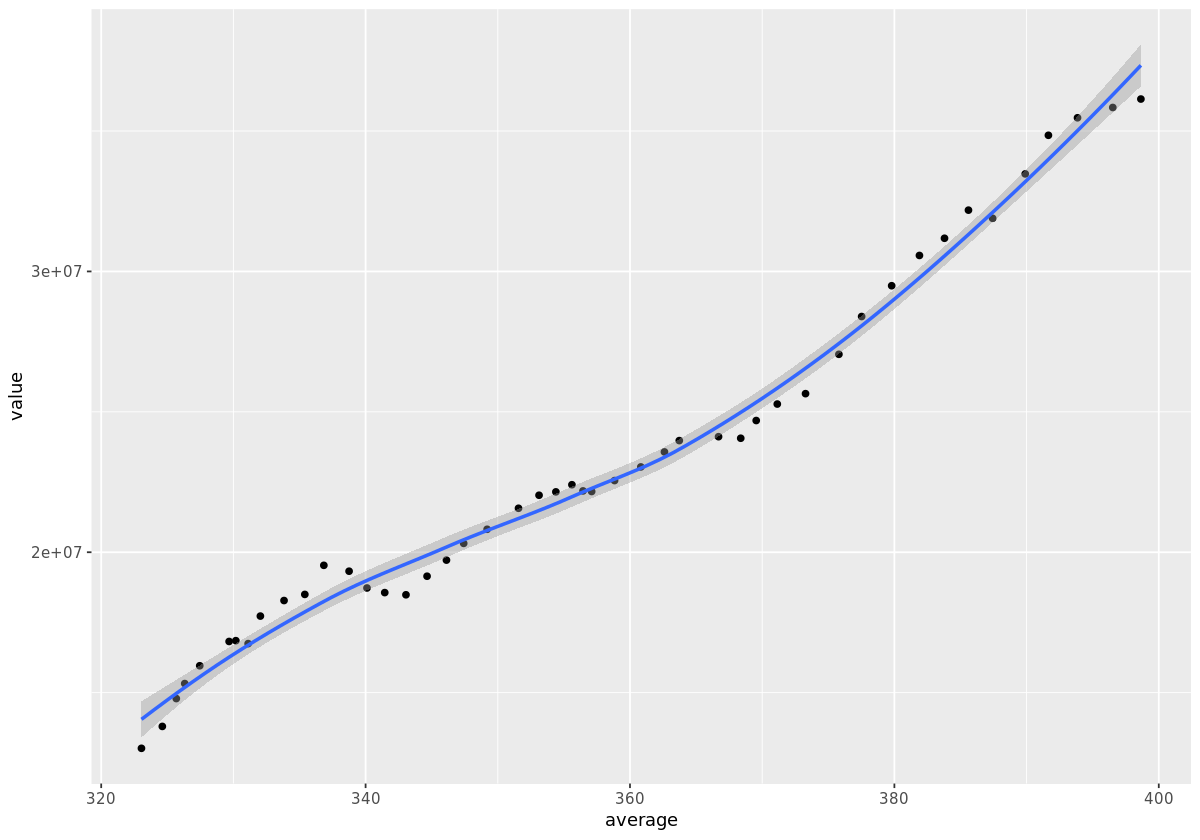

In [184]:
df = data.frame(co2ppm)
#head(df);tail(df)
df=data.frame(year=df$year,average=df$interpolated)
df_clean=matrix(NA,61,ncol=2)

nrow(df)
colnames(df_clean)=c("year","average")
df_clean=data.frame(df_clean)
m=1
for (year in unique(df$year)){
    idx<-which(df$year==year)
    df_clean[m,2]=mean(df[idx,"average"],rm.na=T)
    df_clean[m,1]=year
    m<-m+1
}
head(df_clean)
l=merge(df_clean,CO2_WLD_Kt, by="year")
head(l)
ggplot(l,aes(x=average,y=value))+geom_point()+geom_smooth()

In [185]:
print(paste("la correlacion entre la contamibnacion de los dos paises es alta con un valor de:",cor(l[,1],l[,2])))

[1] "la correlacion entre la contamibnacion de los dos paises es alta con un valor de: 0.996317517032739"


Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [186]:
year = weatherPraga[,2]
min_praga =  weatherPraga[,"EMNT"] 
mn = data.frame(year,min_praga)
gg=merge(mn,l,by="year")
cor(gg[2:4],use="complete.obs")

,min_praga,average,value
min_praga,1.00000000,0.06034432,0.08553448
average,0.06034432,1.00000000,0.98178470
value,0.08553448,0.98178470,1.00000000
